In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
with open('../Datasets/astral-scopedom-seqres-gd-sel-gs-bib-40-2.07.fa','r') as f:
    lines = f.readlines()
    len_lines = len(lines)

In [3]:
num = 0
length_dict = {}
fold_dict = {}
class_dict = {}

for i in range(len_lines):
    line = lines[i]
    if line[0] == '>':
        num += 1
        if i != 0:
            if not clas in class_dict.keys():
                class_dict[clas] = 1
            else:
                class_dict[clas] += 1
                
            if not fold in fold_dict.keys():
                fold_dict[fold] = 1
            else:
                fold_dict[fold] += 1
                
            length = len(seq)
            
            if not length in length_dict.keys():
                length_dict[length] = 1
            else:
                length_dict[length] += 1
                
        fold = line.split(' ')[1]
        fold = '.'.join(fold.split('.')[0:2])
        clas = fold[0]
        seq = ''
    else:
        seq += line.strip('\n')

if not clas in class_dict.keys():
    class_dict[clas] = 1
else:
    class_dict[clas] += 1        
        
if not fold in fold_dict.keys():
    fold_dict[fold] = 1
else:
    fold_dict[fold] += 1
    
length = len(seq)

if not length in length_dict.keys():
    length_dict[length] = 1
else:
    length_dict[length] += 1

In [5]:
print('Sequence Amount: %d'%num)
print('Fold Amount: %d'%len(fold_dict.keys()))
print('Class Amount: %d'%len(class_dict.keys()))
print()
print('Minimum Sequence Length: %d'%min(length_dict.keys()))
print('Maximum Sequence Length: %d'%max(length_dict.keys()))

Sequence Amount: 14323
Fold Amount: 1232
Class Amount: 7

Minimum Sequence Length: 20
Maximum Sequence Length: 1664


Sequence amount of different classes:


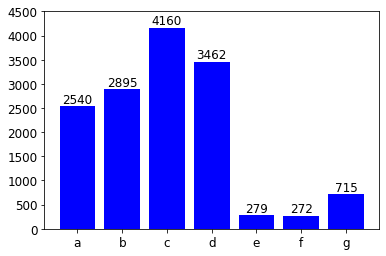

In [6]:
print ('Sequence amount of different classes:')

plt.figure()
plt.ylim([0,4500])
plt.tick_params(labelsize=12)
plt.bar(range(7),class_dict.values(),color='blue',tick_label=list(class_dict.keys()))
for a,b in zip(range(7),class_dict.values()):
    plt.text(a,b+5,'%d'%b,ha='center',va='bottom',fontsize=12)
plt.show()

Sequence amount of different folds:


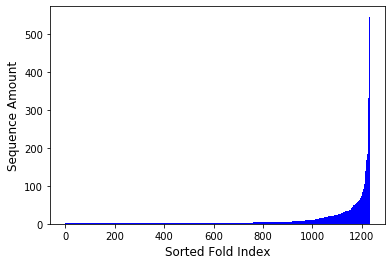

In [17]:
print ('Sequence amount of different folds:')

plt.figure()
#plt.ylim([0,4500])
plt.bar(range(len(fold_dict.keys())),sorted(fold_dict.values()),color='blue',width=1)
plt.xlabel('Sorted Fold Index',fontsize=12)
plt.ylabel('Sequence Amount',fontsize=12)
plt.show()

Sequence amount of different lengths:


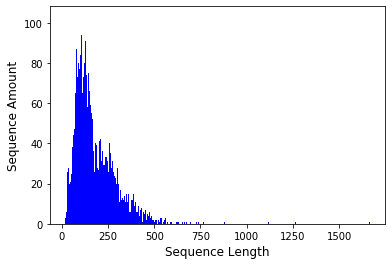

In [8]:
print ('Sequence amount of different lengths:')

plt.figure()
#plt.ylim([0,4500])
plt.bar(length_dict.keys(),length_dict.values(),color='blue',width=1)
plt.xlabel('Sequence Length',fontsize=12)
plt.ylabel('Sequence Amount',fontsize=12)
plt.show()

Sequence Length Distribution:


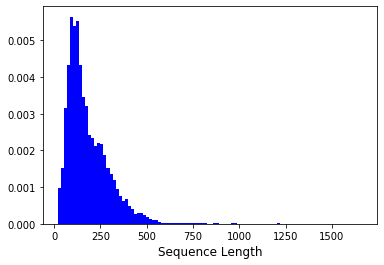

In [9]:
length_list = []
for l in length_dict.keys():
    for n in range(length_dict[l]):
        length_list.append(l)
        
print('Sequence Length Distribution:')

plt.figure()
plt.hist(length_list,bins=100,color='blue',density=True)
plt.xlabel('Sequence Length',fontsize=12)
plt.show()

In [19]:
print('Folds amount with only one sequence: %d'%list(fold_dict.values()).count(1))
print('Folds amount with only two sequences: %d'%list(fold_dict.values()).count(2))
print('Folds amount with only three sequences: %d'%list(fold_dict.values()).count(3))

Folds amount with only one sequence: 460
Folds amount with only two sequences: 196
Folds amount with only three sequences: 104


Sequence amount after reduction: 13471
Fold amount after reduction: 576
Sequence amount of different classes after reduction:


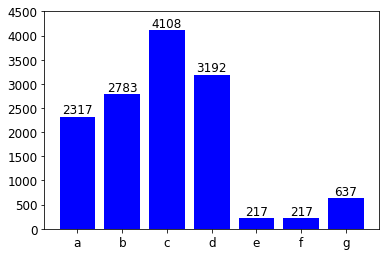

Sequence amount of different folds after reduction:


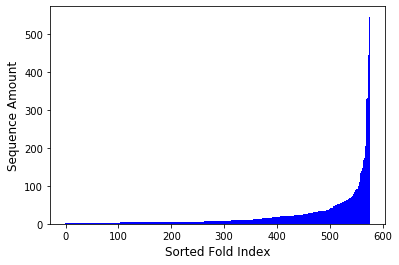

In [26]:
fold_dict_simple = {}
class_dict_simple = {'a':0,'b':0,'c':0,'d':0,'e':0,'f':0,'g':0}

for f in fold_dict:
    f_value = fold_dict[f]
    if f_value >= 3:
        fold_dict_simple[f] = f_value
        class_dict_simple[f[0]] += f_value
        
print('Sequence amount after reduction: %d'%sum(fold_dict_simple.values()))
print('Fold amount after reduction: %d'%len(fold_dict_simple.keys()))

print('Sequence amount of different classes after reduction:')

plt.figure(1)
plt.ylim([0,4500])
plt.tick_params(labelsize=12)
plt.bar(range(7),class_dict_simple.values(),color='blue',tick_label=list(class_dict_simple.keys()))
for a,b in zip(range(7),class_dict_simple.values()):
    plt.text(a,b+5,'%d'%b,ha='center',va='bottom',fontsize=12)
plt.show()

print ('Sequence amount of different folds after reduction:')

plt.figure(2)
#plt.ylim([0,4500])
plt.bar(range(len(fold_dict_simple.keys())),sorted(fold_dict_simple.values()),color='blue',width=1)
plt.xlabel('Sorted Fold Index',fontsize=12)
plt.ylabel('Sequence Amount',fontsize=12)
plt.show()

In [21]:
length_dict_simple = {}
fold = ''

for i in range(len_lines):
    line = lines[i]
    if line[0] == '>':
        num += 1
        if (i != 0) and (fold in fold_dict_simple.keys()):
            
            length = len(seq)
            
            if not length in length_dict_simple.keys():
                length_dict_simple[length] = 1
            else:
                length_dict_simple[length] += 1
                
        fold = line.split(' ')[1]
        fold = '.'.join(fold.split('.')[0:2])
        seq = ''
    else:
        seq += line.strip('\n')

if fold in fold_dict_simple.keys():
    length = len(seq)

    if not length in length_dict.keys():
        length_dict_simple[length] = 1
    else:
        length_dict_simple[length] += 1

Minimum Sequence Length after reduction: 20
Maximum Sequence Length after reduction: 1664

Sequence amount of different lengths after reduction:


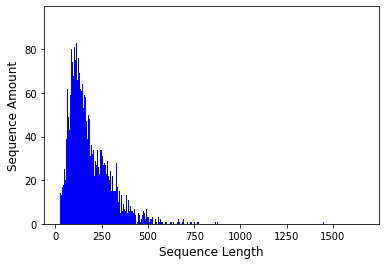

Sequence length distribution after reduction:


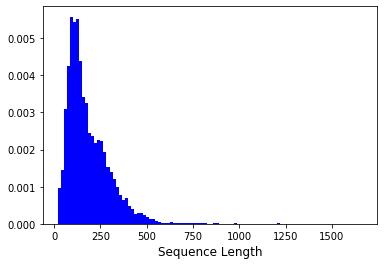

In [24]:
print('Minimum Sequence Length after reduction: %d'%min(length_dict_simple.keys()))
print('Maximum Sequence Length after reduction: %d'%max(length_dict_simple.keys()))
print()
print ('Sequence amount of different lengths after reduction:')

plt.figure(1)
#plt.ylim([0,4500])
plt.bar(length_dict_simple.keys(),length_dict_simple.values(),color='blue',width=1)
plt.xlabel('Sequence Length',fontsize=12)
plt.ylabel('Sequence Amount',fontsize=12)
plt.show()

length_list_simple = []
for l in length_dict_simple.keys():
    for n in range(length_dict_simple[l]):
        length_list_simple.append(l)
        
print('Sequence length distribution after reduction:')

plt.figure(2)
plt.hist(length_list_simple,bins=100,color='blue',density=True)
plt.xlabel('Sequence Length',fontsize=12)
plt.show()

In [28]:
import pickle

with open('../Datasets/fold_num_dict', 'wb') as handle_1:
    pickle.dump(fold_dict, handle_1, protocol=pickle.HIGHEST_PROTOCOL)
    
with open('../Datasets/simple_fold_num_dict', 'wb') as handle_2:
    pickle.dump(fold_dict_simple, handle_2, protocol=pickle.HIGHEST_PROTOCOL)